 <h1><center>Analysis of E-Commerce Product Delivery using Machine learning </h1></center>

The aim of this project is to analyse various factors that affect the delivery of the product, study customer behaviour and predict whether the product from an e-commerce company will arrive on time or not by using machine learning algorithms like Random Forest, Logistic Regression, Decision Tree and K Nearest Neighbors model and compares the model's performance.

# Importing libraries and Data

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv('E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
#Checking the shape of the dataset
df.shape

(10999, 12)

In [4]:
#Checking data types of the columns
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [5]:
#Dropping Indexcolumn
df.drop(['ID'], axis=1, inplace=True)

In [6]:
#Checking for missing values
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
#Checking for duplicates
df.duplicated().sum()

0

In [8]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# Exploratory Data Analysis



Text(0.5, 1.0, 'Gender Distribution')

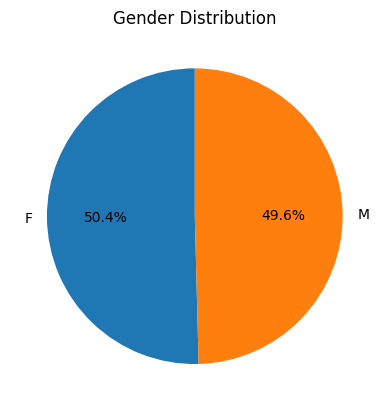

In [10]:
#Gender Distribution
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Cost of the Product')

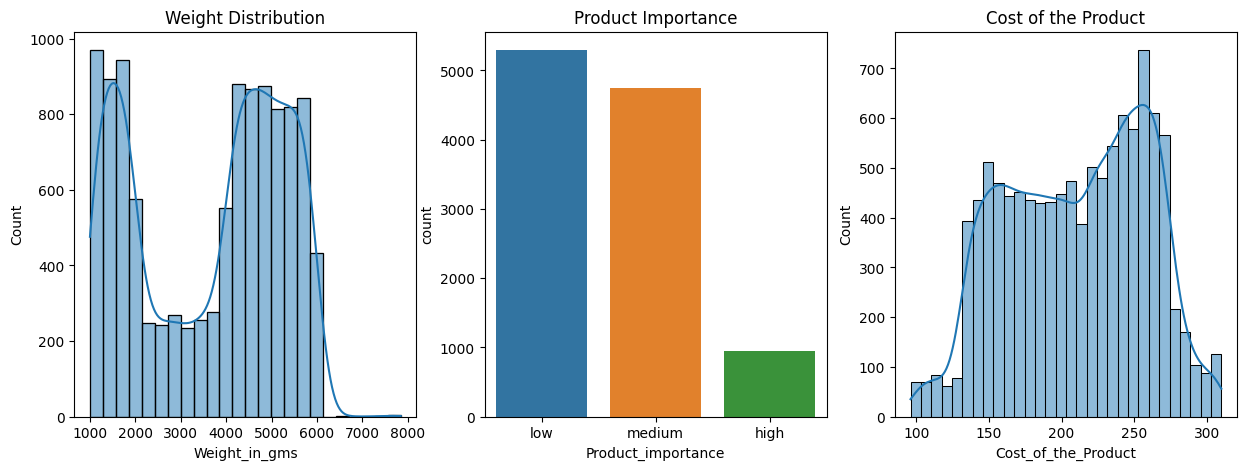

In [11]:
#Product Properties
fig, ax = plt.subplots(1,3,figsize=(15,5))
#Weight Distribution
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
# Product importance
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
#Cost of the Product
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

Text(0.5, 1.0, 'delivred on Time')

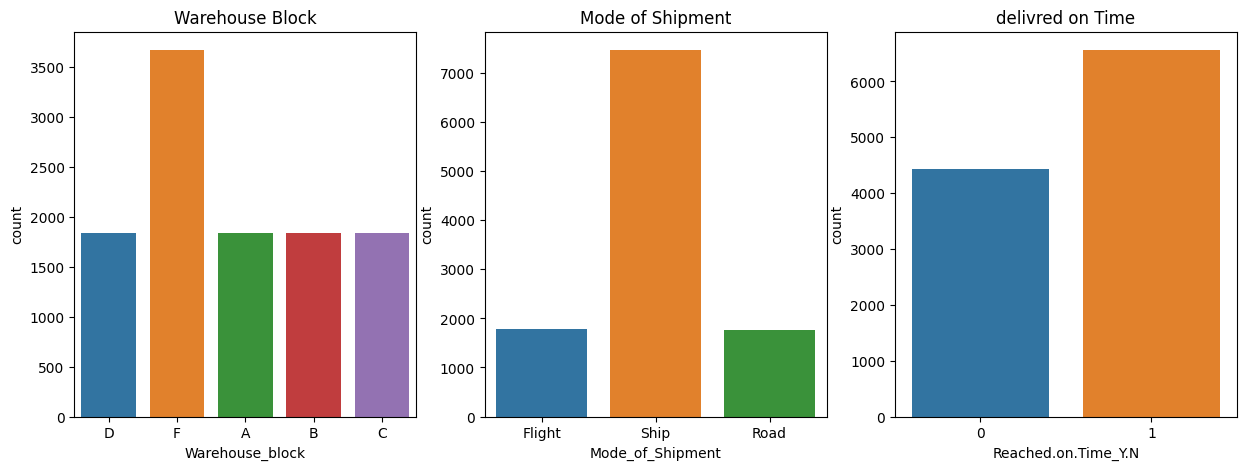

In [12]:
#Logistics
fig, ax = plt.subplots(1,3,figsize=(15,5))
#Warehouse Block
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse Block')
#Mode of Shipment
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1]).set_title('Mode of Shipment')
#delivred on time
sns.countplot(x = 'Reached.on.Time_Y.N', data = df, ax=ax[2]).set_title('delivred on Time')

Text(0.5, 1.0, 'Discount Offered')

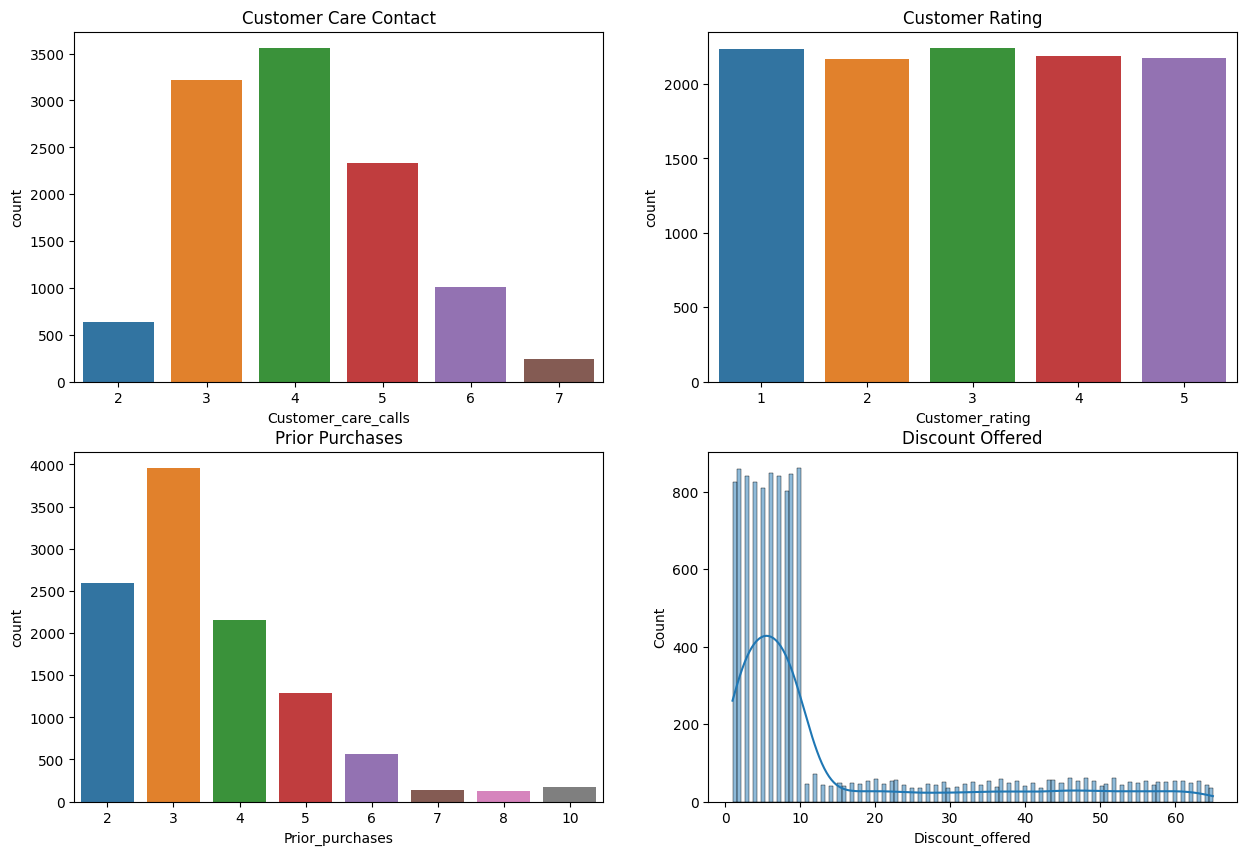

In [13]:
#Customer Experience
fig, ax = plt.subplots(2,2,figsize=(15,10))
#Customer care Contact
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Contact')
#Customer Rating
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
#Prior Purchases
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
#Discount Offered
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

Text(0.5, 1.0, 'Gender vs Reached on Time')

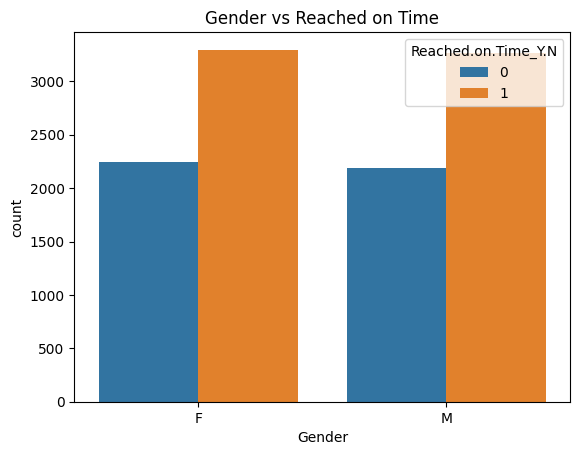

In [14]:
#Customer Gender and Product Delivery
sns.countplot(x = 'Gender', data = df, hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')

Text(0.5, 1.0, 'Cost of the Product')

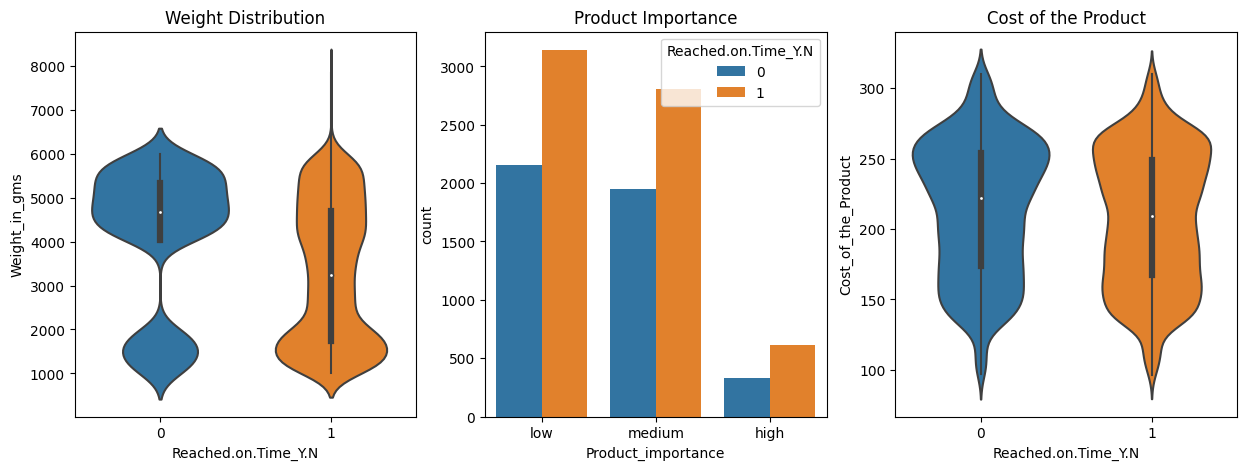

In [15]:
#Product Properties and Product Delivery
fig, ax = plt.subplots(1,3,figsize=(15,5))
#Weight Distribution
sns.violinplot(y = df['Weight_in_gms'], ax=ax[0], kde=True, x = df['Reached.on.Time_Y.N']).set_title('Weight Distribution')
#Product Importance
sns.countplot(x = 'Product_importance', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Product Importance')
#Cost of the Product
sns.violinplot(y = df['Cost_of_the_Product'], ax=ax[2], kde=True, x = df['Reached.on.Time_Y.N']).set_title('Cost of the Product')

#### Logistics and Product Delivery

Text(0.5, 1.0, 'Mode of Shipment')

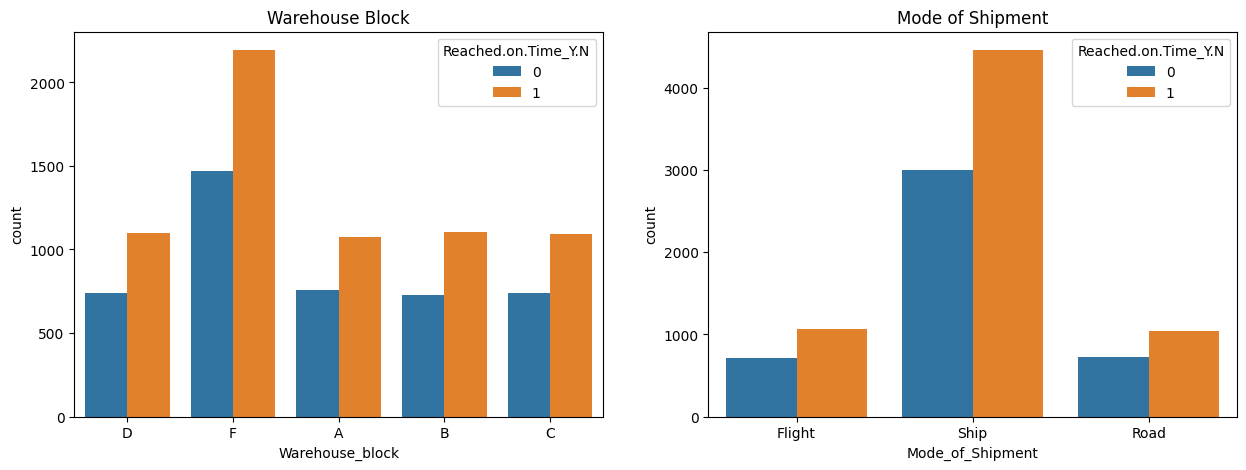

In [16]:
#Logistics and Product Delivery
fig, ax = plt.subplots(1,2,figsize=(15,5))
#Warehouse Block
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
# Mode of Shipment
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

Text(0.5, 1.0, 'Discount Offered')

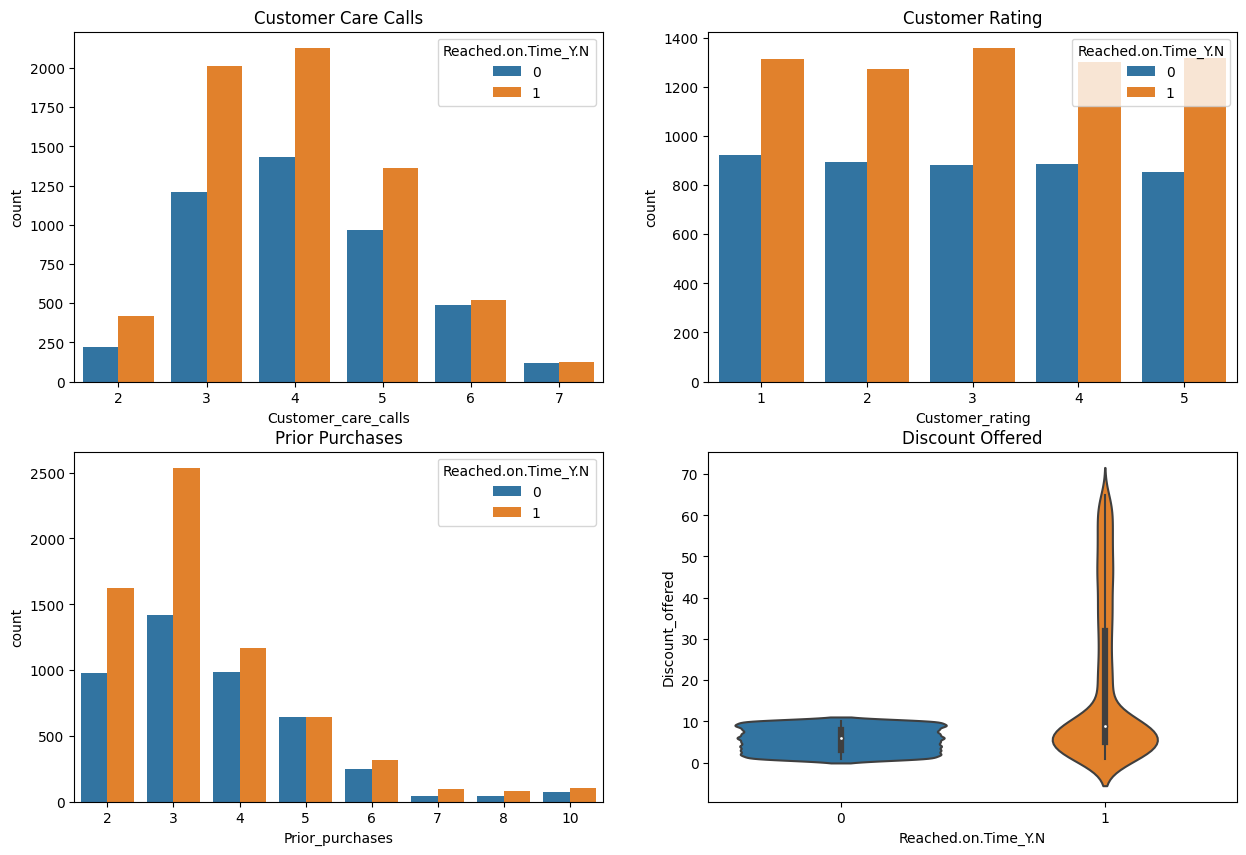

In [17]:
#Customer Experience and Product Delivery
fig, ax = plt.subplots(2,2,figsize=(15,10))
#Customer Care Calls
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
#Customer Rating
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
#Prior Purchases
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
#Discount Offered
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')

# Data Preprocessing

In [18]:
#Label Encoding the Categorical Variables
from sklearn.preprocessing import LabelEncoder

#Label encoding object
le = LabelEncoder()

#columns for label encoding
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

#label encoding
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


<Axes: >

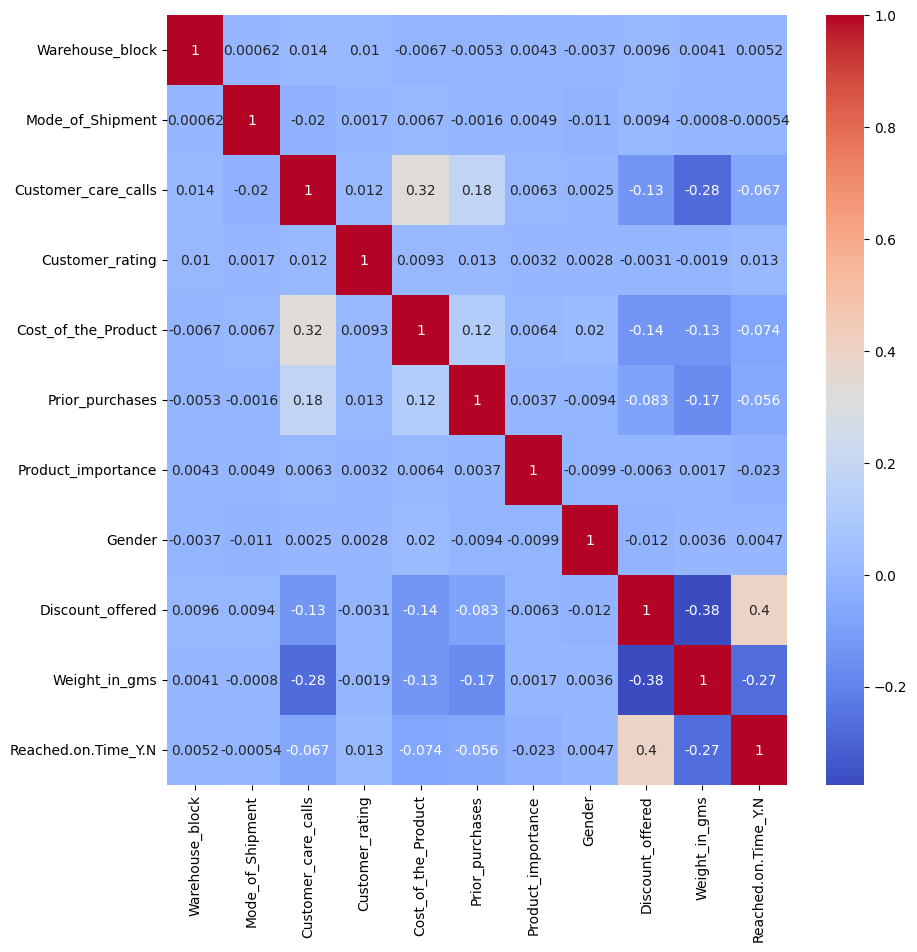

In [19]:
#Correlation Matrix Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [20]:
#Spliting data for Training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

In [22]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


In [23]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [24]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.7253096942834413


In [25]:
#predicting
rfc_pred = rfc.predict(X_test)

# Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

In [27]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [28]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [29]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  0.6913285600636436


In [30]:
#predicting
dtc_pred = dtc.predict(X_test)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

In [32]:
#fitting the model
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
#Training accuracy
lr.score(X_train, y_train)

0.6356404136833731

In [34]:
#predicting
lr_pred = lr.predict(X_test)

# K Nearest Neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

In [36]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
#training accuracy
knn.score(X_train, y_train)

0.7780429594272077

In [38]:
#predicting
knn_pred = knn.predict(X_test)

# Model Evaluation

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

Text(0.5, 1.0, 'KNN')

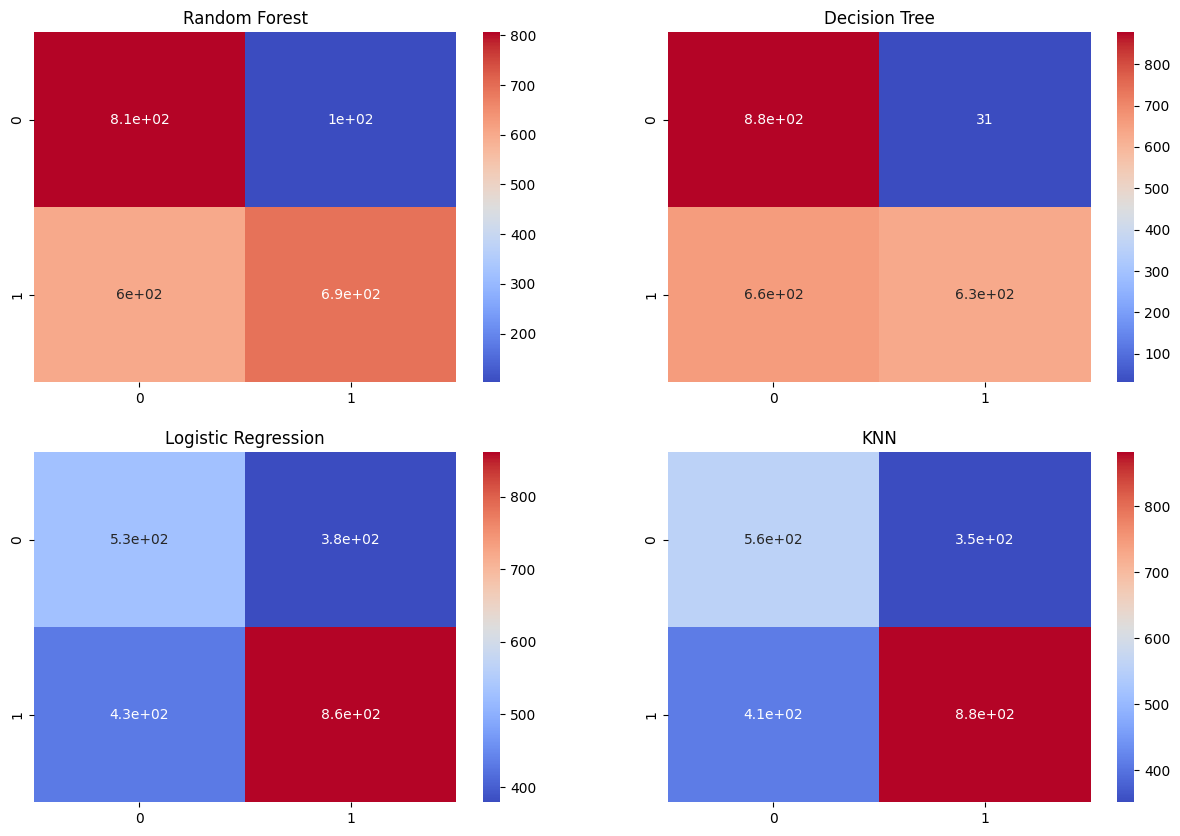

In [40]:
#confusion matrix for the all the models
fig, ax = plt.subplots(2,2,figsize=(15,10))
#confusion_matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest')
#confusion_matrix for Decision Tree
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree')
#confusion_matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
#confusion_matrix for KNN
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN')

In [41]:
#classification report
print('Random Forest: \n', classification_report(y_test, rfc_pred)) #Random Forest
print('Decision Tree: \n', classification_report(y_test, dtc_pred)) #Decision Tree
print('Logistic Regression: \n', classification_report(y_test, lr_pred)) #Logistic Regression
print('KNN: \n', classification_report(y_test, knn_pred)) #KNN

Random Forest: 
               precision    recall  f1-score   support

           0       0.57      0.89      0.70       908
           1       0.87      0.54      0.66      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200

Decision Tree: 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.65      1292

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.69      0.68      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.55      0.58      0.57       908
           1       0.69      0.67      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg     

# Model Comparison

Text(0, 0.5, 'Accuracy')

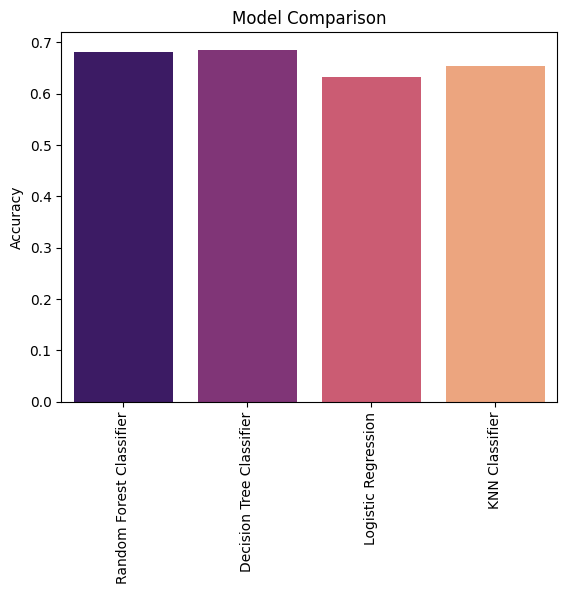

In [42]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

# Conclusion

The project's goal was to forecast whether or not an e-commerce company's merchandise will arrive on time. This research also investigates customer behaviour and analyses numerous aspects that affect product delivery. Based on the exploratory data analysis, I discovered that the product weight and cost have an effect on product delivery. Whereas products weighing between 2500 and 3500 grams and costing less than $250 had a better rate of being delivered on time. Because the majority of the products were sent by ship from warehouse F, it is extremely plausible that warehouse F is near a seaport..

The behaviour of the customer also aids in anticipating the timely delivery of the product. The more customers who phone, the more likely it is that the goods will be delayed. Customers who have made more prior transactions have a higher percentage of things delivered on time, which is why they are returning to the company. those at a discount of 0-10% are more likely to be delivered late, whereas those with a discount of more than 10% are more likely to be delivered on time.

When it comes to machine learning models, the decision tree classifier has the highest accuracy of the others, with a score of 69%. The accuracy of the random forest classifier and logistic regression were 68% and 67%, respectively. The accuracy of the K Nearest Neighbours was the lowest, at 65%.